### 1. Purpose of this notebook

The purpose of this notebook is to explore the customers' data looking for insigths, discoveries and knowledge.

#### What's the question we want to answer with this notebook?

**Who are our customers or who are our principal customers (majority)?**

> Based on the answers we get, we can draw a gereal profile our customers:
 - They are mostly middle age customers (75% are over 43 years old)
- 70% have at least 1 child
- About 65% are married or live together
- 85% are undergraduate or graduate (master or phd)
- 75% have an average annual family income of less than 69000, with an average of ~52000
- Our customers prefer to buy in stores or through the website, mainly in stores. However, they bought every two months, the best frequency being the store. When we open by channel the numbers are bad. **How could we improve the frequency of purchase? In catalog, our customer buys once every 9 months. How much do we invest in this channel?** 
- They do not usually make complaints (more than 99% have not made any complaints in the last two years)
- The average spend on our products in the past two years was about 560, however, 50% of them spent less than 377
- More than 99% of our customers have accessed the site at least once in the last month
- Regarding discounts, almost all customers have already received some discount in the past two years. On average, about 24% of all purchases received some discount. Which doesn't seem like much.

### 2. Read data

#### 2.1 Import Python packages

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import src.data_visualization as dv
import src.eda as eda
from src.paths import DATA

%matplotlib inline
plt.style.use('bmh')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [270]:
dtypes = {'ID': str}
columns = ['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Age', 'MntTotal', 'NumTotalPurchases',
       'AcceptedTotalFirstFiveCmps', 'AcceptedTotalFirstFiveCmpsMorePilot', 'TotalYearAfterRegistration', 'TotalChildren']

df = pd.read_csv(DATA / 'ml_project1_data_pre_processed.csv', dtype=dtypes, usecols=columns)

#### 2.2 Sample data

In [271]:
df.sample(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,Age,MntTotal,NumTotalPurchases,AcceptedTotalFirstFiveCmps,AcceptedTotalFirstFiveCmpsMorePilot,TotalYearAfterRegistration,TotalChildren
1247,8534,Graduation,Married,67433.0,0,2,51,615,28,259,...,13,4,False,68,962,24,1,1,7,2
760,6887,Graduation,Single,79146.0,1,1,33,245,16,223,...,8,6,False,53,548,17,0,0,6,2
439,456,2n Cycle,Married,7500.0,1,0,96,1,11,5,...,3,8,False,34,27,5,0,0,7,1
64,4137,Graduation,Together,70666.0,0,0,29,398,40,367,...,4,4,False,72,1046,15,0,0,7,0
1816,5684,Master,Divorced,44635.0,1,1,25,56,0,9,...,3,7,False,49,65,5,0,0,7,2


### 3. Who are our customers or who are our principal customers (majority)?

#### Age

count    2230.000000
mean       51.100448
std        11.701259
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

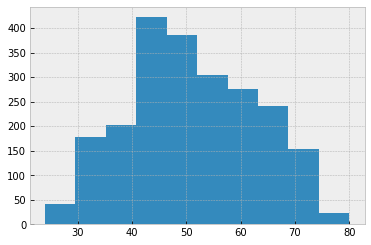

In [272]:
df.query("Age < 115")['Age'].hist()
df.query("Age < 115")['Age'].describe()

75% of our customers are more than 43 years old. Most are middle aged.

#### Education

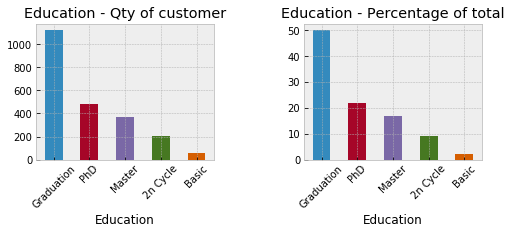

In [273]:
dv.qty_and_percentage(df, 'Education')

Is possible to see that our customers are principaly graduated and post graduated (more than 85%). Are more qualified customers.

#### Marital_Status

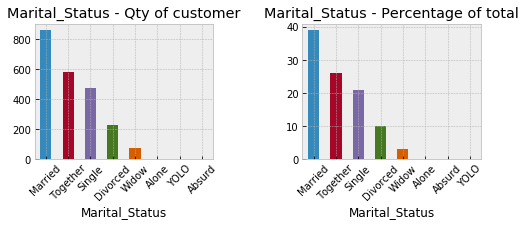

In [274]:
dv.qty_and_percentage(df, 'Marital_Status')

Most of our customers are married or together.

#### Kidhome

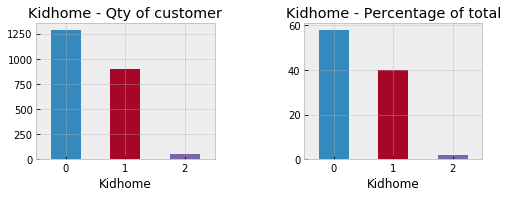

In [275]:
dv.qty_and_percentage(df, 'Kidhome', rotation=0)

#### Teenhome

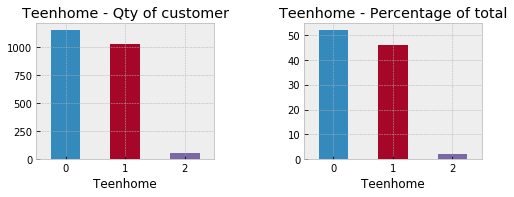

In [276]:
dv.qty_and_percentage(df, 'Teenhome', rotation=0)

#### Total children

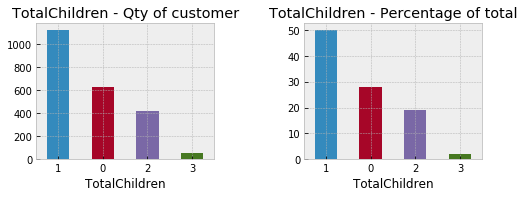

In [277]:
dv.qty_and_percentage(df, 'TotalChildren', rotation=0)

Most of our customers have more than 1 children (more than 70%).

#### Complain

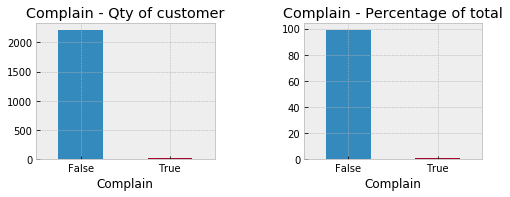

In [278]:
dv.qty_and_percentage(df, 'Complain', rotation=0)

The majority of our customers have not complained in the past two years.

#### Income

In [279]:
income_not_null_values = df[df['Income'].notnull()]['Income']

count      2209.000000
mean      52262.071978
std       24917.065825
min        2447.000000
25%       35416.000000
50%       51411.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

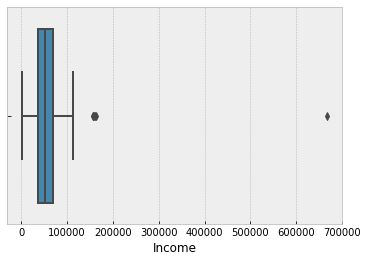

In [280]:
sns.boxplot(x=income_not_null_values)
income_not_null_values.describe()

75% of customers have an income below '$'69000. But, there are some outliers.

If we check how many customers have an income greater than upper bound (iqr method), we will see that there are few (just 6):

In [281]:
q1, q3 = np.percentile(income_not_null_values, [25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

df.query(f'Income > {upper_bound}')['Income']

164     157243.0
617     162397.0
686     160803.0
1296    157733.0
1648    157146.0
2226    666666.0
Name: Income, dtype: float64

Let's remove this customers and check again if there are some outliers.

count      2203.000000
mean      51740.775760
std       20614.006076
min        2447.000000
25%       35364.000000
50%       51369.000000
75%       68334.000000
max      113734.000000
Name: Income, dtype: float64

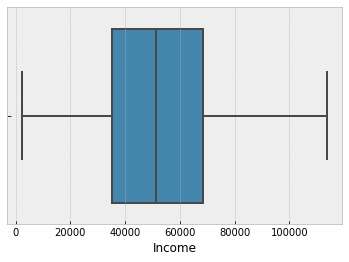

In [282]:
income_outliers_removed = income_not_null_values[income_not_null_values < upper_bound]

sns.boxplot(x=income_outliers_removed)
income_outliers_removed.describe()

Great. The outliers are removed. Our customers have a mean Income of ~$52000.

#### Number of purchases

28082


count    2233.000000
mean       12.575907
std         7.183444
min         1.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: NumTotalPurchases, dtype: float64

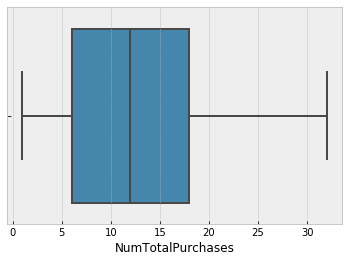

In [283]:
sns.boxplot(x=df['NumTotalPurchases'])
print(df['NumTotalPurchases'].sum())
df['NumTotalPurchases'].describe()

In the last two yeras, were 28 thousand purchases (in this sample of customers). The average purchase by customer is around 12,5. Almost one purchase every two months, if we look by channel, the number decreases.
But, there are some customers who bought more than 50% of the overall average (over 18 purchases). In another moment we can analyze who they are and what their characteristics are.

####  Numeber of purchases by channel

In [330]:
num_purchases_by_channel = pd.DataFrame(df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum(), columns=['NumPurchases'])
bought_at_least_once_channels = pd.DataFrame(df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].applymap(lambda x: 1 if x > 0 else 0).sum(), columns=['BoughtAtLeastOnce'])

##### Bought at least once

In [285]:
bought_at_least_once_channels.assign(Perc = np.multiply(bought_at_least_once_channels['BoughtAtLeastOnce'] / df['NumTotalPurchases'].count(), 100).round(2))

,BoughtAtLeastOnce,Perc
NumCatalogPurchases,1653,74.03
NumStorePurchases,2225,99.64
NumWebPurchases,2191,98.12


If we observe, almost all customers have already purchased at the store or on the web. But, there are about 26% that did not buy by catalog.

##### Frequency

,NumPurchases,Perc
NumCatalogPurchases,5962,21.23
NumStorePurchases,12970,46.19
NumWebPurchases,9150,32.58


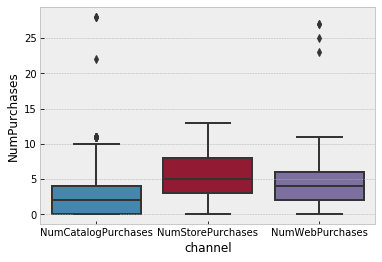

In [331]:
data = df[['ID','NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].melt('ID', var_name= 'channel', value_name='NumPurchases',)
sns.boxplot(data=data, x='channel', y='NumPurchases')
num_purchases_by_channel.assign(Perc = np.multiply(num_purchases_by_channel['NumPurchases'] / num_purchases_by_channel['NumPurchases'].sum(), 100).round(2))

The frequency of amount by channel shows that our customers buy more in the store or on the website, manily store.

##### Frequency by customer and by month

In [332]:
average_purchase_by_channel = (num_purchases_by_channel / df['ID'].count()).round(2)
#Added total
average_purchase_by_channel = pd.concat([average_purchase_by_channel, pd.DataFrame(average_purchase_by_channel.sum(), columns=['Total']).T])
average_purchase_by_channel.assign(OnePurchaseEveryNMonths = average_purchase_by_channel['NumPurchases'].apply(eda.OnePurchaseEveryNMonths))

,NumPurchases,OnePurchaseEveryNMonths
NumCatalogPurchases,2.67,8.99
NumStorePurchases,5.81,4.13
NumWebPurchases,4.10,5.85
Total,12.58,1.91


In the last two years, our consumers bought every two months, the best frequency being the store.
**How could we improve the frequency of purchase?**

#### Deals purchases

In [296]:
np.multiply((df[df['NumDealsPurchases']>0]['NumDealsPurchases'].count() / 2240), 100).round(2)

97.81

Almost all customers have already purchased at least once at a discount.

count    2233.000000
mean        0.241357
std         0.172430
min         0.000000
25%         0.083333
50%         0.200000
75%         0.333333
max         1.000000
dtype: float64

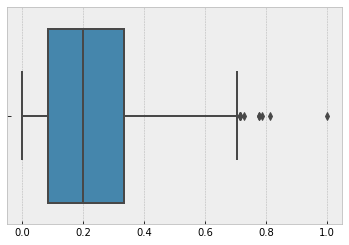

In [303]:
sns.boxplot(x=(df['NumDealsPurchases'] / df['NumTotalPurchases']))
(df['NumDealsPurchases'] / df['NumTotalPurchases']).describe()

Of all purchases made by these customers in the last two years, on average 24% were discounted purchases (considering outliers). Apparently, we don't give much discount.

Text(0.5,0,'percentage of discounted purchases')

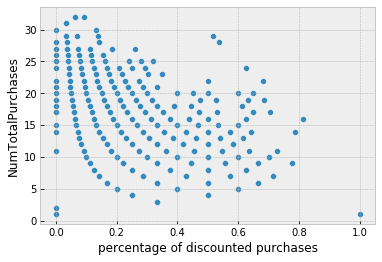

In [311]:
sns.scatterplot(x=df['NumDealsPurchases'] / df['NumTotalPurchases'], y=df['NumTotalPurchases']); plt.xlabel('percentage of discounted purchases')

Apparently, the amount of discount has nothing to do with the amount of purchases. That is, it is not the one who buys more that receives the most discount. Perhaps the discount is related to the product or channel.

#### Visits website last month

In [291]:
bought_at_least_once_WebVisits = df['NumWebVisitsMonth'].apply(lambda x: 1 if x > 0 else 0).sum()
[bought_at_least_once_WebVisits, (bought_at_least_once_WebVisits / df['NumWebVisitsMonth'].count() * 100).round(1)]

[2224, 99.6]

Of total customers (2240), more than 99% accessed the site at least once in the last month. 

count    2233.000000
mean        5.294671
std         2.355702
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

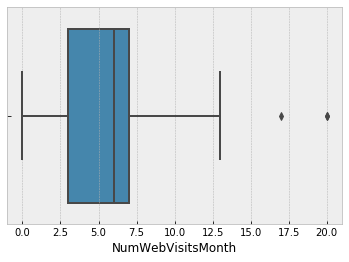

In [300]:
sns.boxplot(x=df['NumWebVisitsMonth'])
df['NumWebVisitsMonth'].describe()

In addition to the good number of customers accessing the site, the average access is around 5. In another notebook we will analyze better how the website is performing.

#### Amount spent

count    2233.000000
mean      563.442454
std       576.737608
min         6.000000
25%        56.000000
50%       343.000000
75%       964.000000
max      2491.000000
Name: MntTotal, dtype: float64

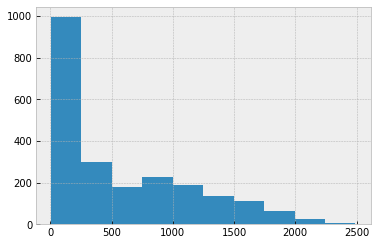

In [293]:
df['MntTotal'].hist()
df['MntTotal'].describe()

The average spent per customer in the last two years is around 576. There are few outliers, and removing them, the average and median do not change much.

But what stands out is that a good portion of customers have spent less than 500 in the past two years. More precisely, 50% spent less than $ 378

and 75% spent less $ 1000 in the last two years.

In [333]:
amount_spend_class = pd.cut(df['MntTotal'], 20)
amount_spend_class.value_counts(normalize=True, sort=False).multiply(100).round(2)

(3.515, 130.25]      37.48
(130.25, 254.5]       7.03
(254.5, 378.75]       7.03
(378.75, 503.0]       6.40
(503.0, 627.25]       4.16
(627.25, 751.5]       3.76
(751.5, 875.75]       4.84
(875.75, 1000.0]      5.46
(1000.0, 1124.25]     4.66
(1124.25, 1248.5]     3.85
(1248.5, 1372.75]     3.36
(1372.75, 1497.0]     2.78
(1497.0, 1621.25]     2.64
(1621.25, 1745.5]     2.28
(1745.5, 1869.75]     1.21
(1869.75, 1994.0]     1.57
(1994.0, 2118.25]     0.81
(2118.25, 2242.5]     0.36
(2242.5, 2366.75]     0.18
(2366.75, 2491.0]     0.13
Name: MntTotal, dtype: float64

Based on the answers we get, we can draw a gereal profile our customers:

- They are mostly middle age customers (75% are over 43 years old)
- 70% have at least 1 child
- About 65% are married or live together
- 85% are undergraduate or graduate (master or phd)
- 75% have an average annual family income of less than 68000, with an average of 51633
- Our customers prefer to buy in stores or through the website, mainly in stores. However, they bought every two months, the best frequency being the store. When we open by channel the numbers are bad. **How could we improve the frequency of purchase? In catalog, our customer buys once every 9 months. How much do we invest in this channel?** 
- They do not usually make complaints (more than 99% have not made any complaints in the last two years)
- The average spend on our products in the past two years was about 560, however, 50% of them spent less than 377
- More than 99% of our customers have accessed the site at least once in the last month
- Regarding discounts, almost all customers have already received some discount in the past two years. On average, about 24% of all purchases received some discount. Which doesn't seem like much.